In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

In [3]:
df = pd.read_csv('../dataset/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-23,62.250000,62.250000,60.090000,60.307999,60.307999,33274500
1,2018-03-26,61.467999,61.518002,58.271999,60.835999,60.835999,41876000
2,2018-03-27,60.799999,60.854000,55.436001,55.835999,55.835999,69360000
3,2018-03-28,52.916000,53.736000,50.419998,51.556000,51.556000,105007000
4,2018-03-29,51.298000,54.192001,49.641998,53.226002,53.226002,75853500


In [4]:
number_simulation = 100
predict_day = 30

close = df['Close'].tolist()
returns = pd.DataFrame(close).pct_change()
last_price = close[-1]
results = pd.DataFrame()
avg_daily_ret = returns.mean()
variance = returns.var()
daily_vol = returns.std()
drift = avg_daily_ret - (variance / 2)
#drift = daily_drift - 0.5 * daily_vol ** 2

results = pd.DataFrame()

for i in tqdm(range(number_simulation)):
    prices = []
    prices.append(df.Close.iloc[-1])
    for d in range(predict_day):
        shock = [drift + daily_vol * np.random.normal()]
        shock = np.mean(shock)
        price = prices[-1] * np.exp(shock)
        prices.append(price)
    results[i] = prices

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 45.35it/s]


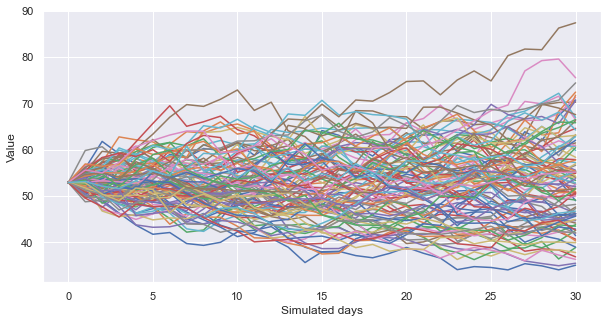

In [5]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


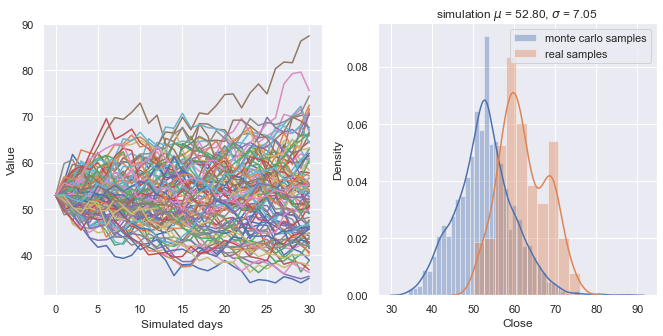

In [6]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.subplot(1,3,2)
# sns.distplot(df.Close,norm_hist=True)
# plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))
# plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.Close,norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()